# CSCI E 7 Homework 10

## 2021

## Fill in your name

In [1]:
first_name = "Cecil"
last_name = "Gilliard"

assert(len(first_name) != 0)
assert(len(last_name)  != 0)
print(first_name, last_name)

Cecil Gilliard


# Problem 1: Subslice

List A is a subslice of list B if you can find x and y such that
```python
A = B[x:y]
```
Write a function that decides if A is a subslice of B

In [64]:
def is_subslice(a, b):
    """Is A a slice from B?"""
    # sort the lists
#     a.sort()
#     b.sort()
    # create sets from lists
    seta = set(a)
    setb = set(b)
    
    if len(seta) == 0 and len(setb) == 0:
        return True
    # https://www.w3schools.com/python/ref_set_issubset.asp
    if seta.issubset(setb):
        return True
    return False

lst1 = [1, 2]
lst2 = [2, 1]

print(set(lst1).intersection(set(lst2)) == set(lst1))

True


In [25]:
def is_subslice(a, b):
    """Is A a slice from B?"""
    if len(a) == 0 and len(b) == 0:
        return True
    elif len(a) == 0 and len(b) > 0:
        return True
    elif set(a).intersection(set(b)) == set(a):
        return True
    return any(a[i:i+len(b)] == b for i in range(len(a)))
        

    
lst1 = [1, 2]
lst2 = [2, 1]

print(is_subslice(lst1, lst2))

True


### Unit Tests

In [24]:
def test_subslice():
    assert(is_subslice([], []))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4, 5], [1, 2, 3, 4, 5]))
    assert(is_subslice([5, 3, 4], [5, 1, 2, 5, 3, 4, 5, 3, 2, 1]))
    assert(is_subslice([], [1, 2, 3, 4, 5]))
    assert(is_subslice([3, 4], [1, 2, 3, 4, 5]))
    assert(is_subslice([1, 2, 3], [1, 2, 3]))
    assert(is_subslice([1, 2, 3], [1, 2, 1, 2, 3, 4, 5])) # If at first you don't succeed
    assert(not is_subslice([1, 2], [12]))
    assert(not is_subslice([1, 2], [2, 1]))
    assert(not is_subslice([1, 2, 3, 4, 5], [2, 3, 4]))
    assert(not is_subslice([1, 3, 5], [1, 2, 3, 4, 5])) # This is a subset, but isn't a subslice
    
    print('Success!')
    
test_subslice()

AssertionError: 

# Problem 2: Word Lengths
We are interested in the distribution of word lengths in English words.  We will use our file words.txt.  

Write a function wordLengths() that takes a path to a list of words and returns a list with tuples holding the number of words of each word length.

Sort your list by length of word.

Here are my partial results: words.txt holds 85 words of length 2, 908 words of length 3, and 3 words of length 21.
```python
    [(2, 85), (3, 908), ... (21, 3)]
```

In [1]:
def wordLengths(filepath):
    """Return sorted list of the number of words of each length"""
    # open file for reading
    with open(filepath, "r") as file:  
        newdict = {}  
        # read each word in file
        for word in file:
            words = word.strip()
#             print(words, len(words))
            # get the length of each word
            key = len(words) 
            # https://stackoverflow.com/questions/1602934/check-if-a-given-key-already-exists-in-a-dictionary
            # check if the key is in the dict, if so add 1 to counter, if not, new key, value 1 
            if key in newdict.keys():  
                newdict[key] = newdict[key] + 1
            else:  
                newdict[key] = 1
#             print(newdict)
        tupleLst = []
        # https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
        # sort dictionary with a for loop        
        for key in sorted(newdict):
            # create tuples 
            tulips = (key, newdict[key])
#             print(tulips)
            # appending tuple to the list.
            tupleLst.append(tulips)
        return tupleLst;  # return list of tuple.
print(wordLengths('words.txt'))

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]


### Unit Tests

In [2]:
## Change this to point to your copy of words.txt
filepath = 'words.txt'

def test_wordLengths(filepath):
    lst = wordLengths(filepath)
    print(lst)
    
    print(lst[0])
    assert lst[0] == (2, 85)
    assert lst[1] == (3, 908)
    assert lst[5] == (7, 21727)
    assert lst[-1] == (21, 3)
    
    print('\nSuccess!')

test_wordLengths(filepath)

[(2, 85), (3, 908), (4, 3686), (5, 8258), (6, 14374), (7, 21727), (8, 26447), (9, 16658), (10, 9199), (11, 5296), (12, 3166), (13, 1960), (14, 1023), (15, 557), (16, 261), (17, 132), (18, 48), (19, 16), (20, 5), (21, 3)]
(2, 85)

Success!


In [12]:
lstT = wordLengths('words.txt')
fen = [x[1] for x in lstT]
ren = [x[0] for x in lstT]
print(ren)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


# Problem 3: Draw a bar chart of the word lengths

Use matplotlib to draw a bar chart of the word lengths.  You may want to peek at the documentation

https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

or at this tutorial

https://datatofish.com/bar-chart-python-matplotlib/

You may want to start with the vidoes I posted in Modules/Video Links/Libraries

Your bar chart should lineup with your results from problem 1.

In [25]:
import matplotlib.pyplot as plt


def plot_bar_chart(filepath):
    """Plot a histogram of word lengths"""
        # open file for reading
    with open(filepath, "r") as file:  
        newdict = {}  
        # read each word in file
        for word in file:
            words = word.strip()
#             print(words, len(words))
            # get the length of each word
            key = len(words) 
            # https://stackoverflow.com/questions/1602934/check-if-a-given-key-already-exists-in-a-dictionary
            # check if the key is in the dict, if so add 1 to counter, if not, new key, value 1 
            if key in newdict.keys():  
                newdict[key] = newdict[key] + 1
            else:  
                newdict[key] = 1
#             print(newdict)
        tupleLst = []
        # https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
        # sort dictionary with a for loop        
        for key in sorted(newdict):
            # create tuples 
            tulips = (key, newdict[key])
#             print(tulips)
            # appending tuple to the list.
            tupleLst.append(tulips)
        # create 2 lists of letter count & frequency
        letterLst = [i[0] for i in tupleLst]
        freqLst   = [i[1] for i in tupleLst]
#         return(freqLst)
        colours = ['blue', 'red', 'purple', 'yellow', 'orange', 'green', 'indigo', 'gold', 'teal']
        plt.bar(letterLst, freqLst, color='green')
        plt.title('Histogram of Word Length')
        plt.xlabel('Word Length')
        plt.ylabel('# of words')
        plt.xlim(2, 21)
        plt.ylim(1, 30000)
        plt.grid(True)
        plt.show()



### Unit Test

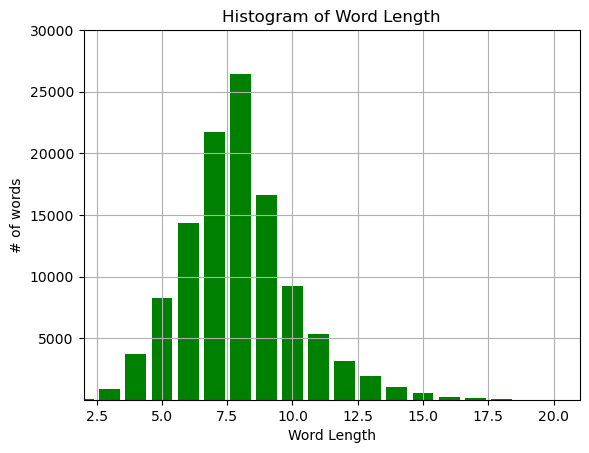

In [26]:
## Use the variable filepath defined above

plot_bar_chart('words.txt')

# Problem 4: Count Pairs

Write a program to count the frequency of each pair of letters in a Fasta file holding a DNA sequence.

Fasta files have a one line header describing the source, and a sequence of lines with information.  
They are used to hold DNA or Amino Acid sequences.  

For example, the file pACYC184.fasta holds a DNA sequence of length 4245, which starts as

```python
GAATTCCGG...
```

That holds the pairs GA, AA, AT, TT, TC, CC, CG, GG, ...

You could store your data in a 2D array, a list of 4 lists of length 4, 
or you could store your data in a Dictionary mapping strings of length 2 to integers.    

Count the frequency of each pair, and print a chart.  For pACYC184.fasta, the chart should look like this:

```python
        A       G       C       T 
A     251     212     231     262 
G     229     287     361     216 
C     288     312     291     276 
T     188     282     284     274 
```
The function print_pair_count() has 'print' in the title, so you may print from the function.

I suggest having functions to read the data, count the pairs, and print the chart.  

In [4]:
def test():
    some_var_set=set('abca')
    print("here is the set:",some_var_set,type(some_var_set))
    some_var_string=''.join(some_var_set)    
    print("here is the string:",some_var_string,type(some_var_string))

test()

here is the set: {'a', 'c', 'b'} <class 'set'>
here is the string: acb <class 'str'>


In [59]:
from collections import defaultdict

def print_pair_count(filename):
    """Print a chart showing frequency of base pairs in Fasta file"""
    dict_chart = count_pairs(filename)
#     print(dict_chart)
#     print('\t', end = ' ')
    lst1 = []
    space = " "
    for item in dict_chart:
        lst1.append(item[0])
    titles = "AGCT"
    string_titles =''.join(titles)
#     print(string_titles)
    # Print the col names
    print(' ', end = ' ')    # Leave space for the row names
    for pos, _ in enumerate(titles):
        print(space * len(str(dict_chart[item])), string_titles[pos], end = '') # line up column titles with numbers
    print()
    for pos, row_ch in enumerate(titles):
        # print row name
        print(string_titles[pos], end = ' ')

        # print row
        for col_ch in titles:
            # if the column matches the row find corresponding item in dict and print to cell
            for item in dict_chart:
                if (col_ch + row_ch) == item:
                    print((space * len(row_ch)), dict_chart[item], end="") 
        # Skip to new line
        print()
#         print(f'this is string:', str(string_titles[pos]))
    
def read_file(filename):
    """make dictionary of the base pairs and their frequency"""
    # open file for reading, skip 1st line and read entire file as one string and remove \n
    with open(filename, "r") as dna_file:
        next(dna_file)
        dna = dna_file.read().replace("\n", '')
        return dna
        

def count_pairs(filename):
    """Count the pairs in a string"""
    newdict = defaultdict(int)
    string = read_file(filename)
#     print(string)
    # make list of the pairs from string
    # https://stackoverflow.com/questions/66024561/extract-list-of-consecutive-letter-pairs-from-string
    pairs = [string[i:i+2] for i in range(len(string)-1)]
#     print(len(pairs))
    # add pairs to dictionary
    for pair in pairs:
        newdict[pair] = newdict[pair] + 1  
    return(newdict) 


print_pair_count('pACYC184.fasta')

      A    G    C    T
A   251  229  288  188
G   212  287  312  282
C   231  361  291  284
T   262  216  276  274


### Unit Tests

You will need to have copies of the three datasets in your directory.  

Be sure to check the lengths of your strings: you don't want the newlines from the file included in your strings.

## Run your program on the datasets below

In [49]:
print_pair_count('pKLMF-FX.fasta')  # string of length 9988

      A    G    C    T
A   859  626  639  546
G   623  582  550  638
C   560  627  565  601
T   629  557  599  786


In [50]:
print_pair_count('ecoli.fasta')     # string of length 4641652

         A       G       C       T
A   338006  267384  325327  212024
G   238013  270252  346793  322379
C   256773  384102  271821  267395
T   309950  255699  236149  339584


In [51]:
print_pair_count('Human22.fasta')   # string of length 31264301

         A       G       C       T
A   2364973  1906206  2414606  1432121
G   2360439  2238900  513594  2407152
C   1594610  1784420  2237613  1907300
T   1797885  1590558  2358130  2355793


Does anything seem odd in the last table?

yes, for some reason my column titles are off... The GC is significantly less than the other base pairs...
Possible genetic disorder? 🤔

# Problem 5: The Extension School
Use Beautiful Soup to examine the base landing page https://www.extension.harvard.edu

How many links are there?

Links may be relatve or absolute:
    /academics/programs/academic-gap-year/ is a relative link: you get an absolute link by adding the base
            
    https://www.extension.harvard.edu/academics/programs/academic-gap-year/
    
How many links are relative?  How many are relative, and how many are absolute?

(Why would a relative path be useful?)

How many links appear twice?

Which links appear three times?  

## Find all the links

In [8]:
from bs4 import BeautifulSoup
import requests

# first, we want to read the rules of the road
webpage = requests.get("https://www.extension.harvard.edu/robots.txt")
webtext = webpage.text
print(webtext)

User-agent: *
Disallow: /wp-admin/
Allow: /wp-admin/admin-ajax.php
Disallow: /wp-content/uploads/sites/8/wpforms/



In [9]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url("https://www.extension.harvard.edu/robots.txt")
rp.read()
print(rp.can_fetch("*", "https://www.extension.harvard.edu/"))

True


In [31]:
webpage = requests.get("https://www.extension.harvard.edu/")
webtext = webpage.text
soup = BeautifulSoup(webtext, "html.parser") 
links = soup.find_all('a')
flst = []
for i in links:
    if i.get("href").startswith("https"):
        continue
#      print(i['href'], ":", i.string) 
    flst.append(i.get('href'))
print(len(flst))  
# print(len(links))  # number of links on page

24


In [105]:
## 


## How many links are there?

In [32]:
from bs4 import BeautifulSoup
import requests


webpage = requests.get("https://www.extension.harvard.edu/")
webtext = webpage.text

soup = BeautifulSoup(webtext, "html.parser") 
links = soup.find_all('a') 
print(len(links))  # number of links on page


114


## How many are relative links?

In [38]:
## 
 
links = soup.find_all('a')
flst = [i.get("href") for i in links if not i.get("href").startswith("https")] # list of relative links
print(len(flst))  


24


## How many links appear exactly twice?

In [62]:
from collections import defaultdict

olddict = defaultdict(int)

for link in links:
    olddict[link] = olddict[link] + 1
rst = [olddict[i] for i in olddict] # I was manually looking through to make sure
# print(rst)
setoflinks = set(links)

print(len(links) - len(setoflinks)) # only 1 double


1


## Which links appear three or more times?

In [7]:
## List the links that appear more than twice

## it appears 0 links appear 3 or more times 

# Post Mortem
## How long did it take you to solve this problem set?
## Did anything confuse you or cause difficulty?

In [ ]:
## Your thoughts
I couldn't figure out on my own how to fix 10.1 and didn't have the time this week to get the help needed. 
Will be interesting to see the solution.
10.4 was an absolute nightmare. That being said, I'm better for having experienced it.🥰
